### Decision Tree Algorithm

In [1]:
# import the libraries
import pandas as pd
banking_df=pd.read_csv("E:\Sankhyana Training\Datasets\Decision_Tree_loan_data_set.csv")
banking_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
banking_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
# droping the loan Id column
banking_df1=banking_df.drop(["Loan_ID"], axis= 1)
banking_df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# filling the missing values

banking_df2= banking_df1.fillna(method="bfill")

In [6]:
banking_df2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
# checking the total number number of value in the depents colunts
banking_df2.Dependents.value_counts()

0     354
2     105
1     104
3+     51
Name: Dependents, dtype: int64

In [8]:
import warnings 
warnings.simplefilter("ignore")
banking_df2["Dependents"][banking_df2["Dependents"]=="3+"]=3

In [9]:
banking_df2.Dependents.value_counts()

0    354
2    105
1    104
3     51
Name: Dependents, dtype: int64

In [10]:
banking_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt



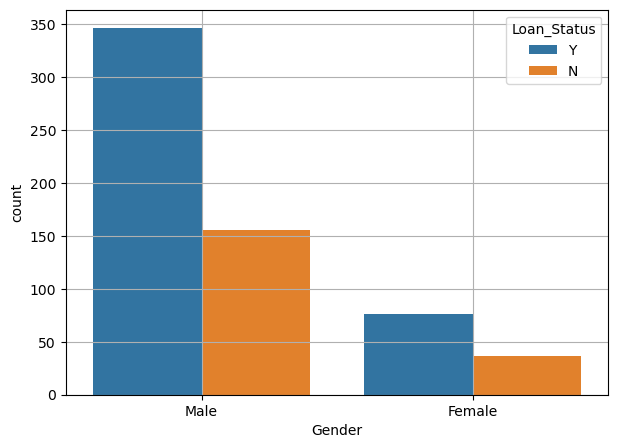

In [12]:
fig=plt.figure(figsize=(7, 5))
sns.countplot(x= "Gender", hue= "Loan_Status", data = banking_df2)
plt.grid()

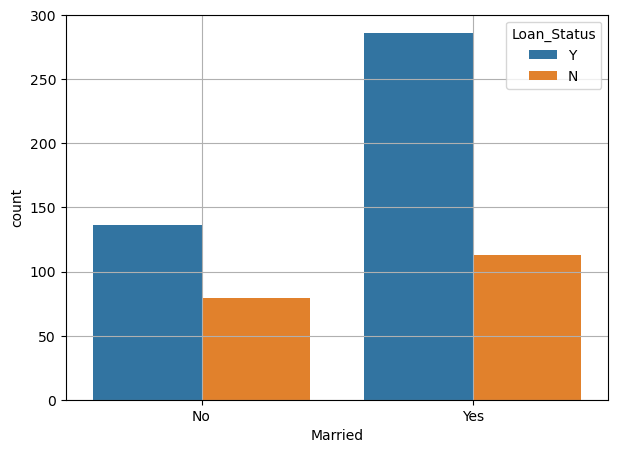

In [13]:
fig=plt.figure(figsize=(7, 5))
sns.countplot(x= "Married", hue= "Loan_Status", data = banking_df2)
plt.grid()

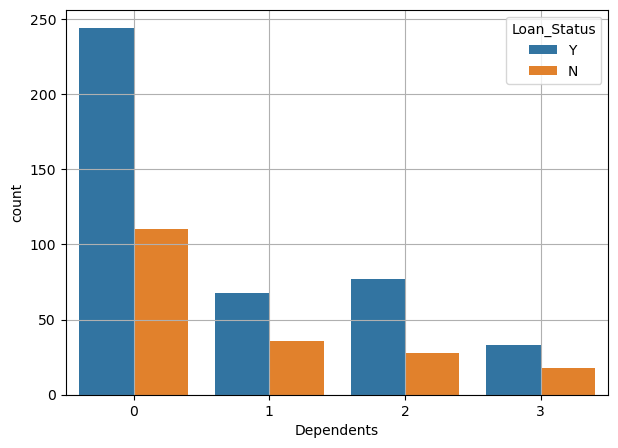

In [14]:
fig=plt.figure(figsize=(7, 5))
sns.countplot(x= "Dependents", hue= "Loan_Status", data = banking_df2)
plt.grid()

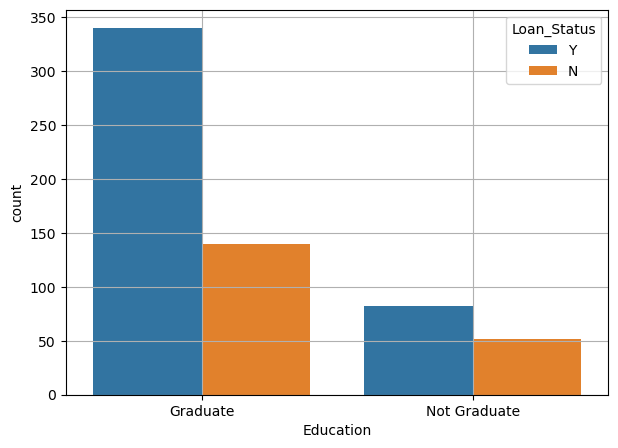

In [15]:
fig=plt.figure(figsize=(7, 5))
sns.countplot(x= "Education", hue= "Loan_Status", data = banking_df2)
plt.grid()

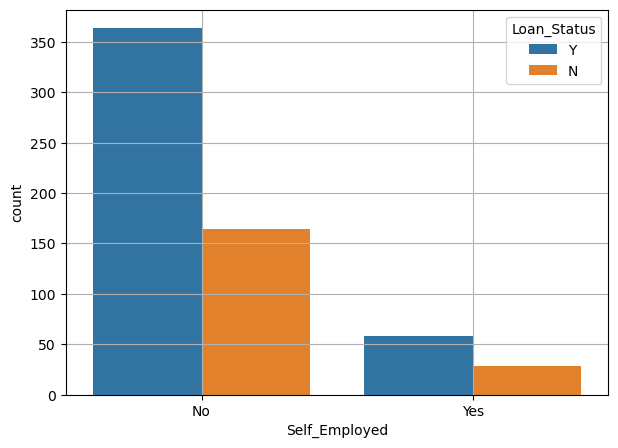

In [16]:
fig=plt.figure(figsize=(7, 5))
sns.countplot(x= "Self_Employed", hue= "Loan_Status", data = banking_df2)
plt.grid()

In [17]:
banking_df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
# encording the columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

banking_df2["Gender"]= le.fit_transform(banking_df2["Gender"])
banking_df2["Married"]= le.fit_transform(banking_df2["Married"])
banking_df2["Education"]= le.fit_transform(banking_df2["Education"])
banking_df2["Self_Employed"]= le.fit_transform(banking_df2["Self_Employed"])
banking_df2["Property_Area"]= le.fit_transform(banking_df2["Property_Area"]) 
banking_df2["Loan_Status"]= le.fit_transform(banking_df2["Loan_Status"]) 

#banking_df2["Loan_Status"]= banking_df2["Loan_Status"].astype(int)

In [19]:
banking_df2["Dependents"]= banking_df2["Dependents"].astype(int)

In [20]:
banking_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [21]:
# input features
data = banking_df2.iloc[:, :11]
data.shape

(614, 11)

In [22]:
# target feature
target = banking_df2.iloc[:, 11]

In [23]:
target_col = banking_df2.columns[11]
target_col

'Loan_Status'

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, train_size= 0.8)

In [25]:
X_train.shape

(491, 11)

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
pred = model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred)

0.8455284552845529

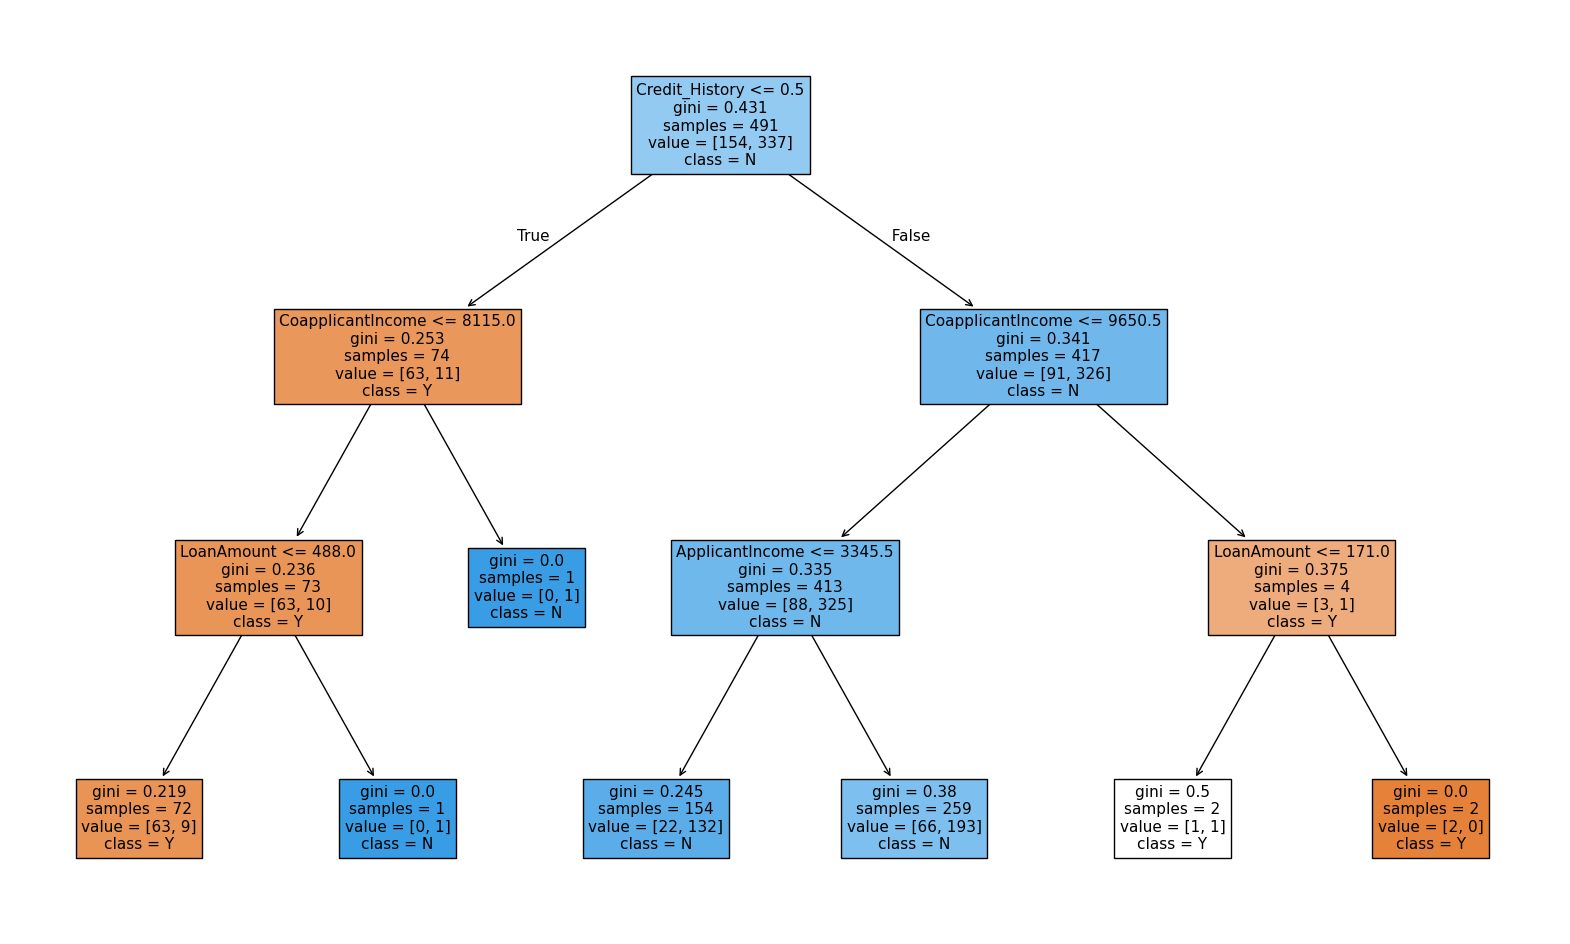

In [29]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize = (20, 12))
a= plot_tree(model, feature_names= data.columns, fontsize=11, filled=True, class_names = ['Y','N'])

In [30]:
loan_for_aoproved_customers = banking_df[banking_df["Credit_History"] >= 0.5]

loan_for_aoproved_customers= loan_for_aoproved_customers[loan_for_aoproved_customers["ApplicantIncome"]>=3000]
loan_for_aoproved_customers= loan_for_aoproved_customers[loan_for_aoproved_customers["LoanAmount"]>=66]

print(loan_for_aoproved_customers[['Loan_ID','ApplicantIncome', 'LoanAmount']])

      Loan_ID  ApplicantIncome  LoanAmount
1    LP001003             4583       128.0
2    LP001005             3000        66.0
4    LP001008             6000       141.0
5    LP001011             5417       267.0
8    LP001018             4006       168.0
..        ...              ...         ...
606  LP002961             3400       173.0
607  LP002964             3987       157.0
608  LP002974             3232       108.0
611  LP002983             8072       253.0
612  LP002984             7583       187.0

[315 rows x 3 columns]
